In [161]:
import numpy as np
import sys
from scipy.constants import c,hbar,k

sys.path.append('../scripts')

In [162]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
from elements import *
import measurement as me

In [164]:
import matplotlib
import matplotlib.pyplot as plt

# Simple Cavity

In the example below we simulate the emmition spectrum of a hot resonator. Here the temperature of the bath is higher than the temperature of the drive and therefore we can see an emmition shaped like a Lorenzian.

### Definition of modes

In [165]:
omega_c = 5e9*np.pi*2
a = Mode('a', omega_c)

### Definition of inputs


In [166]:
kappa_ex = 0.2e6*np.pi*2
kappa_0 = 0.3e6*np.pi*2
kappa = kappa_ex + kappa_0

T_drive = 2e-5
T_bath = 10e-3

a_inex = Input('ex', a, kappa_ex, kind = 'drive', omega_drive = omega_c, bath_temp=T_drive)
a_in0 = Input('0', a, kappa_0, kind = 'bath', bath_temp=T_bath)

### Definition of system

In [167]:
sys_cav = System([a], [a_in0,  a_inex], [])

### Definition of outputs

In [168]:
a_outex = Output(sys_cav, a_inex)

### Measurement of the spectrum

<IPython.core.display.Javascript object>


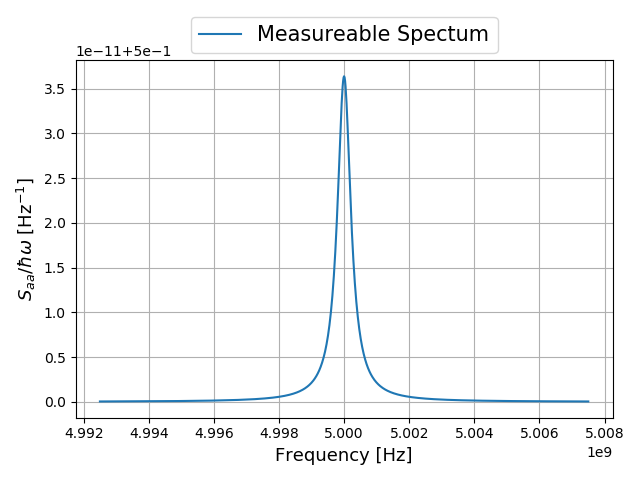

In [181]:
omegas = np.linspace( omega_c - 15*kappa, omega_c +  15*kappa, 1001)
spec = me.spectrum(omegas, me.PowerMeasurement(a_outex), components = 0, plot = True)


### Measurement of the Linear response

<IPython.core.display.Javascript object>


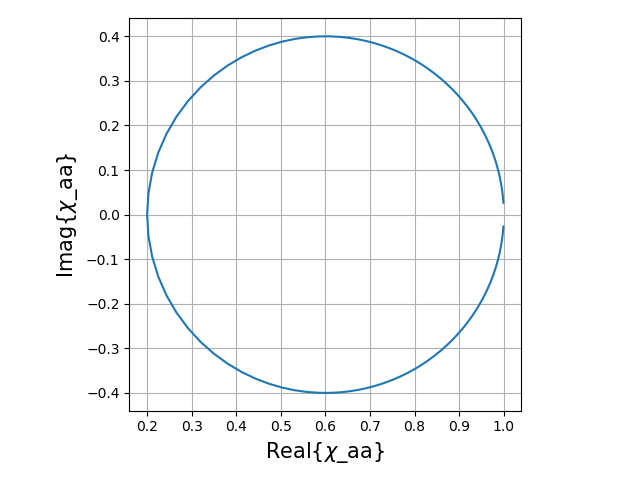

<IPython.core.display.Javascript object>


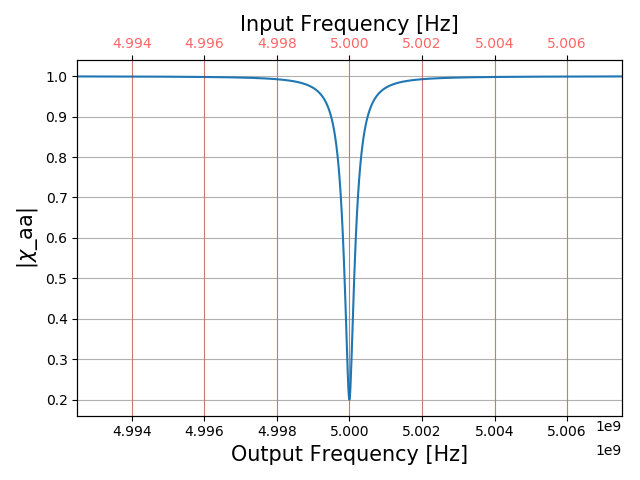

<IPython.core.display.Javascript object>


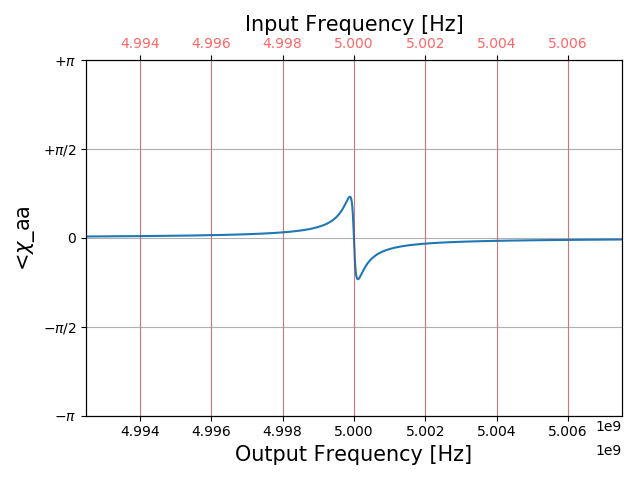

In [184]:
omegas_newex, S_ex = me.linear_response(omegas, sys_cav, a_outex, a_inex, plot = 1)

### Comparison with theory

<IPython.core.display.Javascript object>


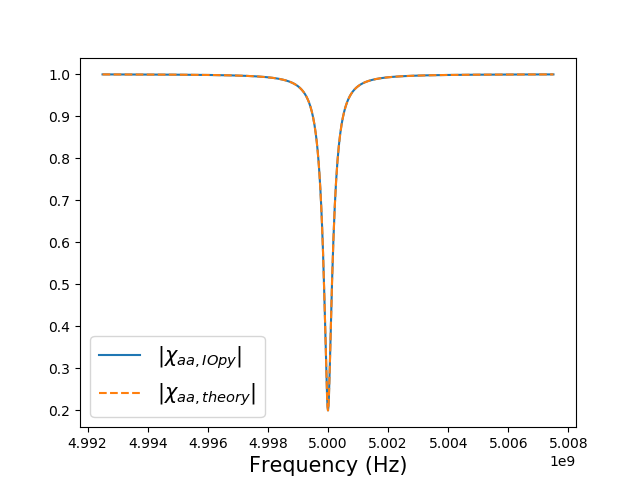

<IPython.core.display.Javascript object>


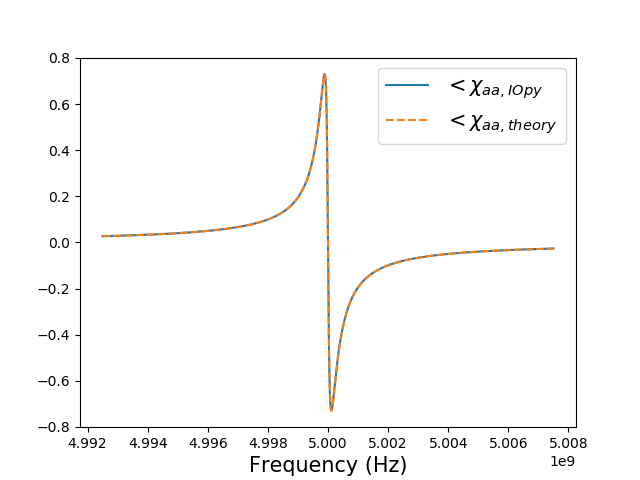

In [189]:
S_th = 1 - kappa_ex / (kappa/2 - 1j * (omegas-omega_c) )

plt.figure()
plt.plot(omegas/2/np.pi, np.abs(S_ex), label = '$|\chi_{aa,IOpy}|$')
plt.plot(omegas/2/np.pi, np.abs(S_th), label= '$|\chi_{aa,theory}|$', linestyle = '--' )
plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.legend(prop={'size': 15})

plt.figure()
plt.plot(omegas/2/np.pi, np.angle(S_ex), label = '$<\chi_{aa,IOpy}$')
plt.plot(omegas/2/np.pi, np.angle(S_th), label= '$<\chi_{aa,theory}$', linestyle = '--' )
plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.legend(prop={'size': 15})